In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective & Context
This notebook analyzes the volatility and risk profile of the VFV stock. 
VFV tracks the S&P 500 index, so understanding its risk metrics is crucial for portfolio management.
We will explore historical price data, calculate key risk indicators, and visualize market behavior.

In [32]:
# Load Data
vfv_data = pd.read_csv('../data/vfv_raw_data.csv', parse_dates=['Date'], index_col='Date')
vfv_data.sort_index(inplace=True)
vfv_data.rename(columns={'Market price (CAD)': 'Close'}, inplace=True)
vfv_data['Close'] = vfv_data['Close'].replace('[\$,]', '', regex=True).astype(float)
vfv_data

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/d_/vtbtm_tx56jbs30plxf7r3mh0000gn/T/ipykernel_68869/950173769.py:5: SyntaxWarning: invalid escape sequence '\$'
  vfv_data['Close'] = vfv_data['Close'].replace('[\$,]', '', regex=True).astype(float)


,NAV (CAD),Close
Date,,
2014-11-18,$41.2499,41.245
2014-11-19,$41.3631,41.360
2014-11-20,$41.2772,41.285
2014-11-21,$41.2651,41.245
2014-11-24,$41.5520,41.565
...,...,...
2025-03-03,$150.7359,150.700
2025-03-04,$148.5961,148.600
2025-03-05,$148.8868,148.800


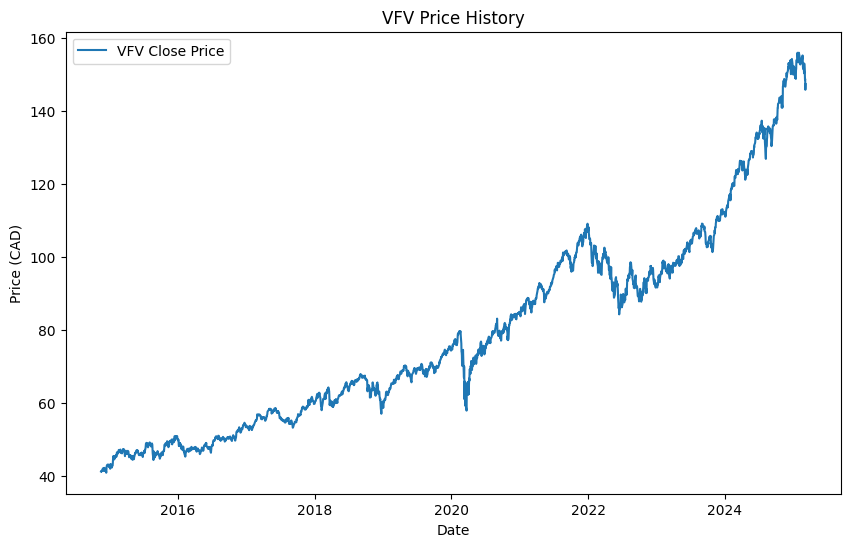

In [33]:
# Visualize Price History
plt.figure(figsize=(10,6))
plt.plot(vfv_data['Close'], label='VFV Close Price')
plt.title('VFV Price History')
plt.xlabel('Date')
plt.ylabel('Price (CAD)')
plt.legend()
plt.show()

In [34]:
# Calculate Daily Returns
vfv_data['Returns'] = vfv_data['Close'].pct_change()

# Summary Statistics of Returns
print(vfv_data['Returns'].describe())

count    2584.000000
mean        0.000543
std         0.010010
min        -0.100986
25%        -0.004064
50%         0.000807
75%         0.005662
max         0.082096
Name: Returns, dtype: float64


In [35]:
# Volatility Analysis (Rolling 30-day Standard Deviation)
vfv_data['Volatility'] = vfv_data['Returns'].rolling(window=30).std()
vfv_data

,NAV (CAD),Close,Returns,Volatility
Date,,,,
2014-11-18,$41.2499,41.245,NaN,NaN
2014-11-19,$41.3631,41.360,0.002788,NaN
2014-11-20,$41.2772,41.285,-0.001813,NaN
2014-11-21,$41.2651,41.245,-0.000969,NaN
2014-11-24,$41.5520,41.565,0.007759,NaN
...,...,...,...,...
2025-03-03,$150.7359,150.700,-0.015033,0.007791
2025-03-04,$148.5961,148.600,-0.013935,0.008157
2025-03-05,$148.8868,148.800,0.001346,0.008169


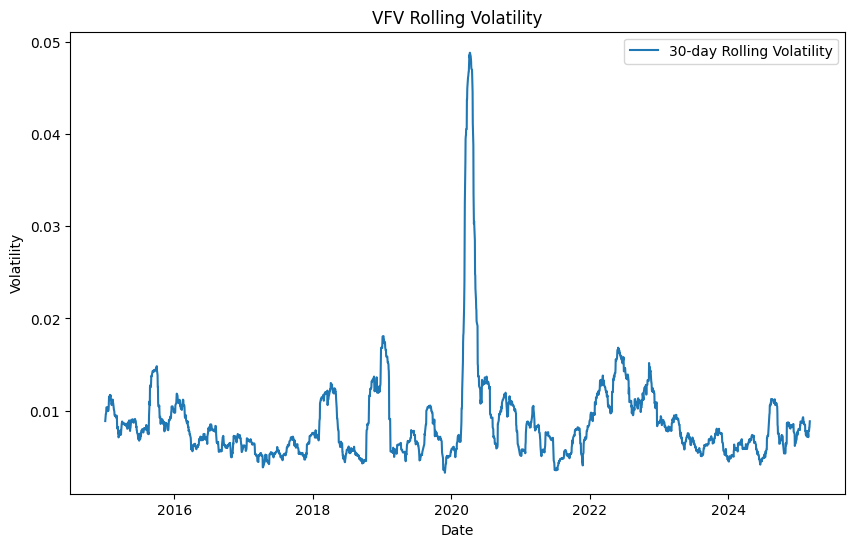

In [36]:
plt.figure(figsize=(10,6))
plt.plot(vfv_data['Volatility'], label='30-day Rolling Volatility')
plt.title('VFV Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### Volatility Spike
The huge spike in rolling volatility around early 2020 aligns with the COVID-19 market crash — a clear sign of extreme market stress. Outside of that period, VFV’s volatility seems relatively stable, with occasional upticks.

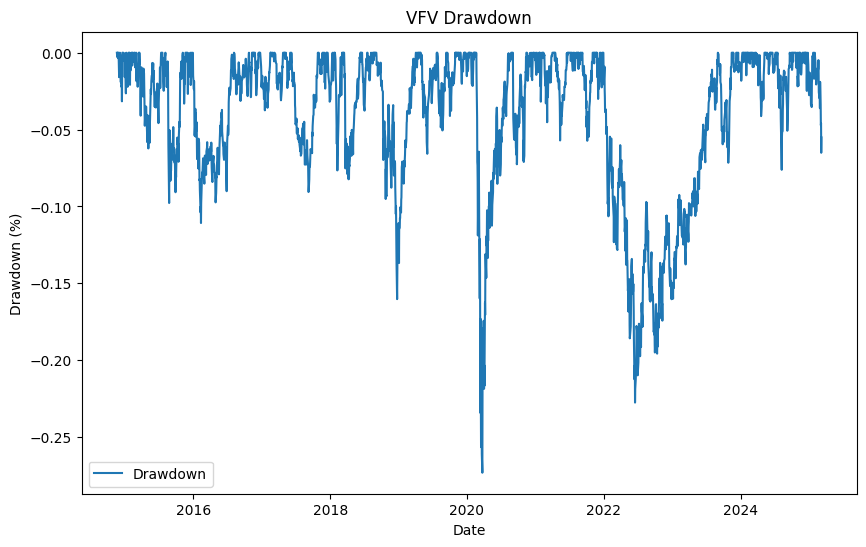

In [37]:
# Drawdown Analysis
cumulative_returns = (1 + vfv_data['Returns']).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max

plt.figure(figsize=(10,6))
plt.plot(drawdown, label='Drawdown')
plt.title('VFV Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.show()

### Drawdown Patterns
The drawdown chart shows multiple sharp declines, with the most significant drawdown (~27%) during 2020. More recent drawdowns, like in 2022, also show notable market pullbacks — suggesting that while the stock recovers well, it’s still vulnerable to broader market selloffs.

In [38]:
# Sharpe Ratio (Annualized)
risk_free_rate = 0.02 / 252  # Assuming 2% annual risk-free rate
daily_sharpe = (vfv_data['Returns'].mean() - risk_free_rate) / vfv_data['Returns'].std()
annual_sharpe = daily_sharpe * np.sqrt(252)
print(f'Annualized Sharpe Ratio: {annual_sharpe:.2f}')

Annualized Sharpe Ratio: 0.74


### Sharpe Ratio (0.74)
This indicates moderate risk-adjusted returns. It’s not exceptionally high, which suggests the return you’re getting relative to the risk isn’t the most efficient — but it’s also not terrible for a broad index tracker like VFV.

In [39]:
# Value at Risk (VaR) Calculation
var_95 = np.percentile(vfv_data['Returns'].dropna(), 5)
print(f'95% Value at Risk (VaR): {var_95:.2%}')

95% Value at Risk (VaR): -1.49%


### 95% Value at Risk (VaR: -1.49%)
This tells us that on 95% of trading days, you shouldn’t expect to lose more than 1.49% of your investment. It’s a helpful downside risk metric, showing the likely worst-case daily losses under normal market conditions.

## Overall Takeaways
The overall takeaway from the volatility and risk analysis of VFV is that while it offers strong long-term growth potential, it carries notable exposure to market downturns. The volatility spike in early 2020 and the significant 27% drawdown during the COVID-19 crash emphasize its vulnerability to broader market stress. Though VFV has shown strong recovery after market pullbacks, recurring drawdowns like those in 2022 show it’s still susceptible to sharp declines. The Sharpe ratio of 0.74 reflects moderate risk-adjusted returns, suggesting there’s room for more efficient risk-return balance. Meanwhile, the 95% Value at Risk (-1.49%) provides a useful measure of daily downside risk, indicating the likely worst-case losses under normal conditions. Given these risk characteristics, pairing VFV with lower-volatility assets or hedging strategies could help manage overall portfolio risk. Let me know if you want to explore how VFV’s risk measures stack up against other ETFs or indices!